<a href="https://colab.research.google.com/github/tas-anne/Digital-Image-Processing/blob/main/190041220_DIP_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ID: 190041220
##Tasfia Tasneem Annesha
##CSE 4734: Digital Image processing

#Task # 01 (Linear Filter)

For this task, use the image: "Fig0333(a)(test_pattern_blurring_orig)" from Chapter 03 zip

a) Implement the Smoothing Operation with Average Filter (Box & Weighted Average filters)

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage.io
import skimage.color
import skimage.filters
from scipy import signal
import random

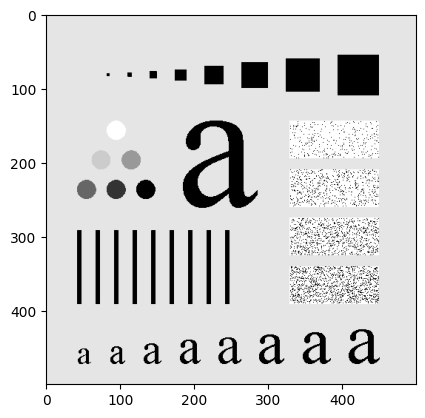

In [ ]:
img = cv2.imread("Fig0333(a)(test_pattern_blurring_orig).tif")
img = skimage.color.rgb2gray(img/255)
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
def display_convolution(img, f):
  convolved_output= signal.convolve2d(img, f, boundary='symm', mode='same')
  plt.imshow(convolved_output, cmap='gray')
  plt.title('Convolved Image')
  plt.axis('off')
  plt.show()


##box filter

In [ ]:
def create_boxfilter(n):
    f = np.ones((n, n))
    f = f * (1/(n*n))
    return f

b) Change the user defined parameters to obtain different levels of blurring effects

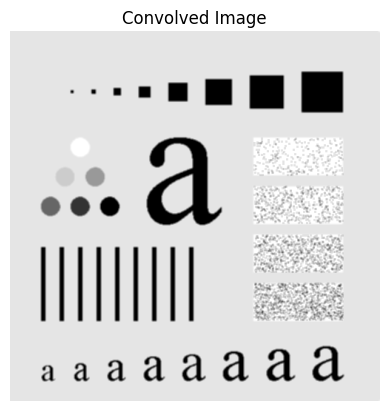

In [ ]:
f = create_boxfilter(3)
display_convolution(img, f)

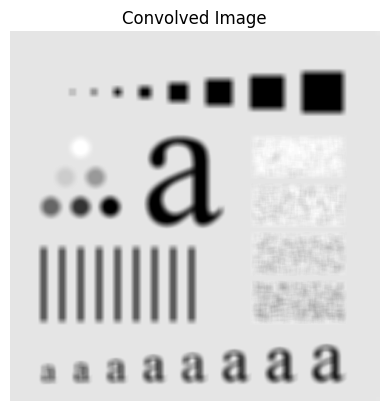

In [ ]:
f = create_boxfilter(10)
display_convolution(img, f)

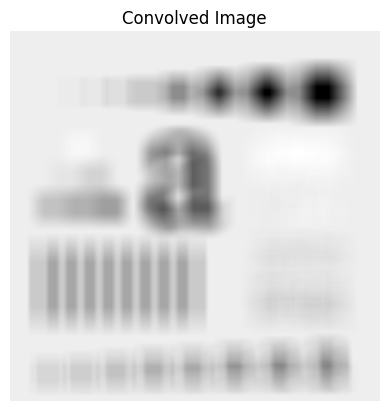

In [ ]:
f = create_boxfilter(40)
display_convolution(img, f)

##weighted avg filter

In [ ]:
def create_weighted_average_filter(n):

    arr = np.zeros(n)
    for i in range(n//2 + 1):
        arr[i] = 2**i
        arr[n - i - 1] = arr[i]
    kernel = np.outer(arr, arr)
    normalized_kernel= kernel/np.sum(kernel)

    return normalized_kernel

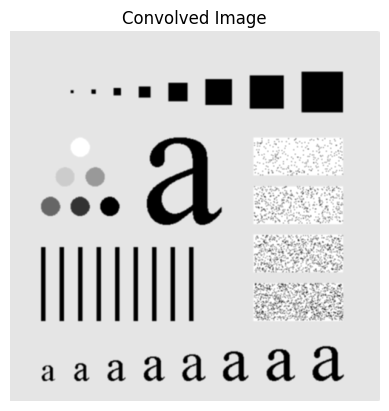

In [ ]:
f = create_weighted_average_filter(3)
display_convolution(img, f)

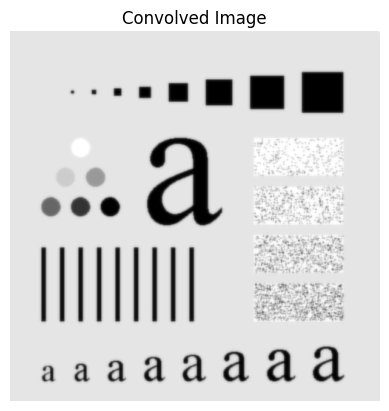

In [ ]:
f = create_weighted_average_filter(10)
display_convolution(img, f)

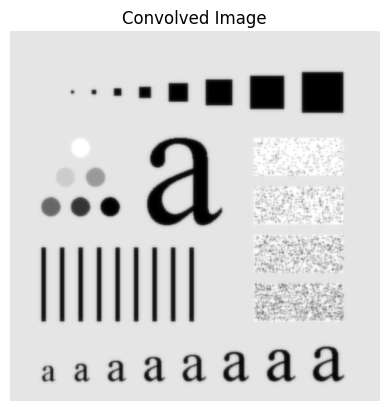

In [ ]:
f = create_weighted_average_filter(40)
display_convolution(img, f)

c) Explain how the blurring effect can be increased or decreased.


As evident, increasing the filter size results in a greater degree of blurriness in the image, but it also leads to a more significant reduction in noise.The impact of filter size on weighted filters closely resembles that of box filters. When the filter size is enlarged, the image becomes more blurred, and there is a more substantial reduction in noise.When you directly compare the outcomes of a box filter and a weighted average filter, it becomes evident that a box filter exhibits more pronounced smoothing effects when both use the same filter size.

#Task # 02 (Non-Linear Filter)

For this task, use the image : "Fig0335(a)(ckt_board_saltpep_prob_pt05)" from Chapter 03 zip

a) Use a function (built-in or your own) to artificially add Salt&Pepper noise to the image.

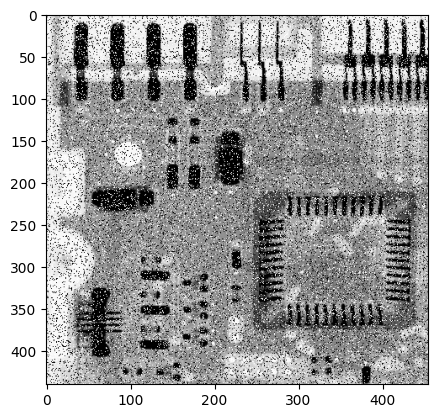

In [ ]:
img = cv2.imread("Fig0335(a)(ckt_board_saltpep_prob_pt05).tif")
img = skimage.color.rgb2gray(img/255)
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
def add_saltpepper_noise(img, noise_range=(20, 500)):
    imgcpy=img.copy()
    row, col = img.shape
    num_salt = random.randint(noise_range[0], noise_range[1])
    num_pepper = random.randint(noise_range[0], noise_range[1])

    for i in range(num_salt):
        x = random.randint(0, col - 1)
        y = random.randint(0, row - 1)
        imgcpy[y, x] = 1

    for i in range(num_pepper):
        x = random.randint(0, col - 1)
        y = random.randint(0, row - 1)
        imgcpy[y, x] = 0

    return imgcpy

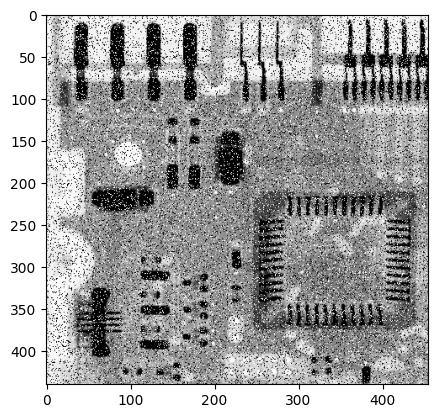

In [ ]:
noisy_img = add_saltpepper_noise(img, noise_range=(200, 500))
plt.imshow(noisy_img, cmap='gray')
plt.show()

In [ ]:
def median_filter(img, window=3):
    row, col = img.shape
    pad_width = (window - 1) // 2
    out = np.zeros(img.shape)
    img_pad = np.pad(img, pad_width=pad_width)

    for x in range(row):
        for y in range(col):
            window_values = img_pad[x:x+window, y:y+window]
            median_value = np.median(window_values)
            out[x, y] = median_value

    return out

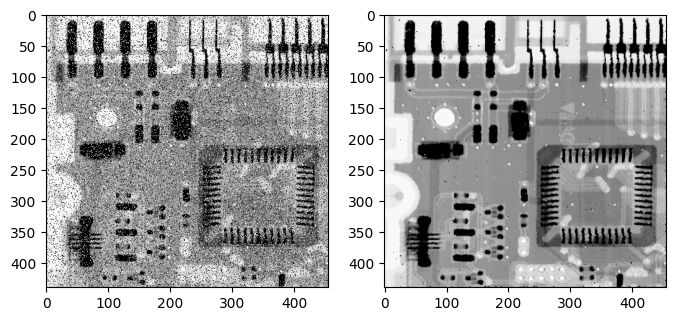

In [ ]:
out = median_filter(noisy_img, window=3)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
ax1.imshow(noisy_img, cmap='gray')
ax2.imshow(out, cmap='gray')
plt.show()

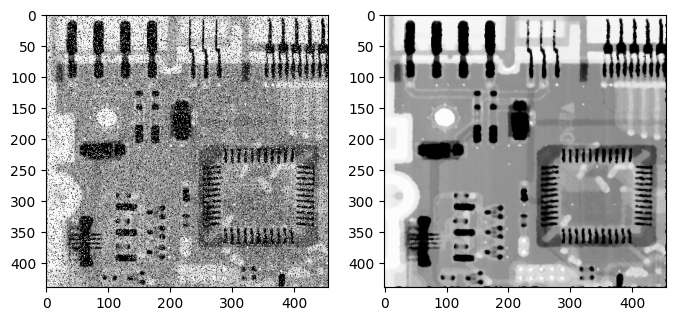

In [ ]:
noisy_img = add_saltpepper_noise(img, noise_range=(2000, 2100))
out = median_filter(noisy_img, window=5)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
ax1.imshow(noisy_img, cmap='gray')
ax2.imshow(out, cmap='gray')
plt.show()

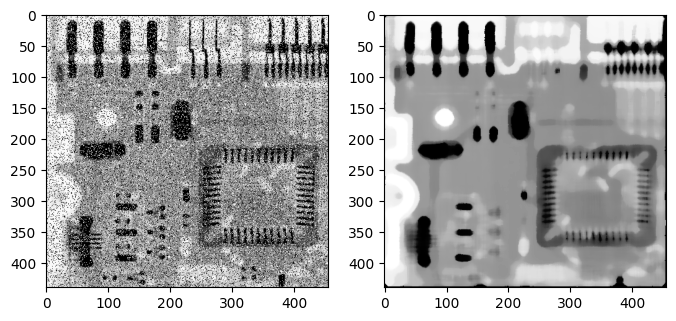

In [ ]:
noisy_img = add_saltpepper_noise(img, noise_range=(3000, 8000))
out = median_filter(noisy_img, window=15)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
ax1.imshow(noisy_img, cmap='gray')
ax2.imshow(out, cmap='gray')
plt.show()

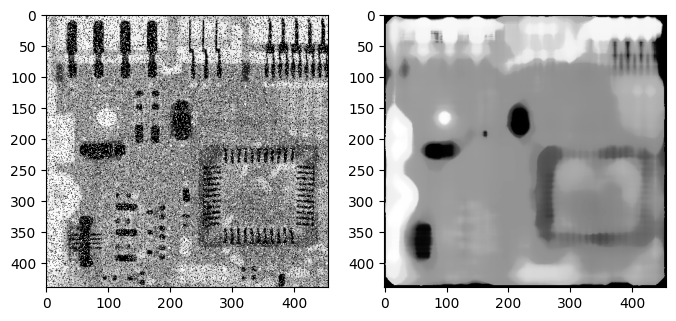

In [ ]:
noisy_img = add_saltpepper_noise(img, noise_range=(8000, 10000))
out = median_filter(noisy_img, window=35)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
ax1.imshow(noisy_img, cmap='gray')
ax2.imshow(out, cmap='gray')
plt.show()

c) Analyze the changes in result by varying the noise amount. Change filter size too.


Augmenting the filter size leads to a more prominent noise reduction effect. However, when the filter size becomes excessively large, it causes a loss of image information, as illustrated in the two larger filters below.

#Task # 03 (Image Sharpening)

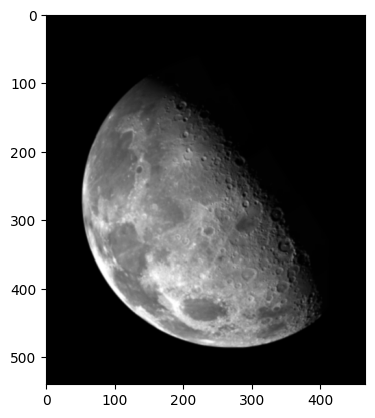

In [ ]:
img = cv2.imread("/content/Fig0338(a)(blurry_moon).tif")
img = skimage.color.rgb2gray(img/255)
plt.imshow(img, cmap='gray')
plt.show()

a) Compute edge responses using Laplacian filter.

In [ ]:
def create_laplacian_filter():

    f = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    return f

c) Produce the sharp output using Laplacian response:

g = f + c x (f*w)

In [ ]:
def sharpen(img, c=1):

    f = create_laplacian_filter()
    out = img + c * signal.convolve2d(img, f, boundary='symm', mode='same')
    out = np.abs(out)
    return out

b) Display Laplacian image after scaling.

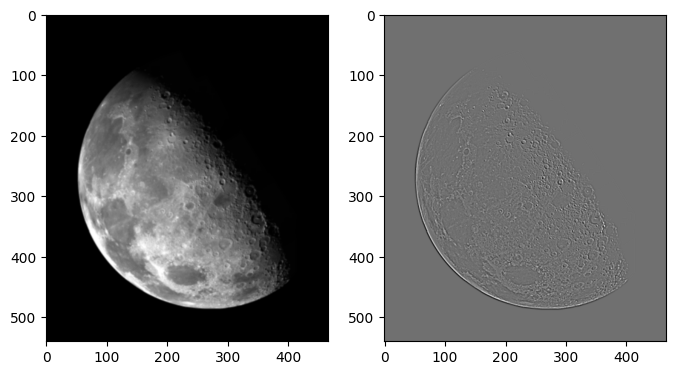

In [ ]:
f = create_laplacian_filter()
out = signal.convolve2d(img, f, boundary='symm', mode='same')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
ax1.imshow(img, cmap='gray')
ax2.imshow(out, cmap='gray')
plt.show()

d) Vary user defined parameter c to obtain different levels of sharpness.

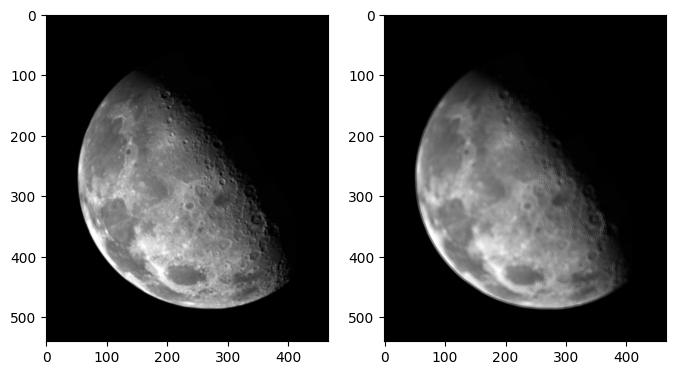

In [ ]:
img_sharp = sharpen(img, c=-1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
ax1.imshow(img, cmap='gray')
ax2.imshow(img_sharp, cmap='gray')
plt.show()

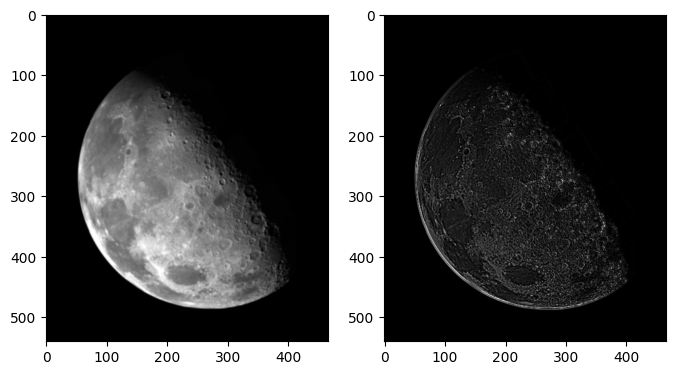

In [ ]:
img_sharp = sharpen(img, c=10)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
ax1.imshow(img, cmap='gray')
ax2.imshow(img_sharp, cmap='gray')
plt.show()

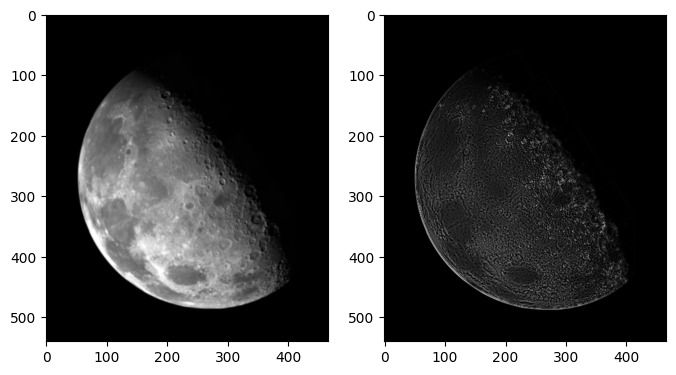

In [ ]:
img_sharp = sharpen(img, c=-10)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
ax1.imshow(img, cmap='gray')
ax2.imshow(img_sharp, cmap='gray')
plt.show()